In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from statsmodels.sandbox.stats.runs import runstest_1samp 
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [137]:

def rng(r,N): # try to overflow for several times
    r *= N
    r *= 314159
    r *= 2718281
    r = r*r
    r = r // 100
    r *= 314159
    r *= 2718281
    return r
N = 1119

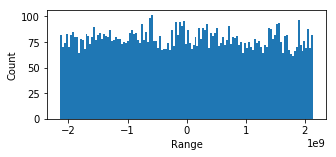

p1 0.8643745151449341
p2 0.0


In [192]:
n = 10000 # n numbers
rr = 100000000 # range
m = np.int32(np.random.randint(-2147483648,2147483648-n)) # random starting point of input, say get this from time query gametime
#m,N = 0,1
RNG = np.empty(n,dtype=np.int32)
for i in np.arange(m,n+m): # input increases by 1
    out = rng(np.int32(i),N)
    RNG[i-m] = out
    N += 1
#RNG = (RNG)%rr
plt.figure(figsize=(5,2))
plt.hist(RNG,bins=128)
#plt.xlim([0,rr])
plt.ylabel('Count')
plt.xlabel('Range')
plt.show()
print('p1',runstest_1samp(RNG, correction=False)[1]) # test if output distribution is likely random
print('p2',stats.kstest(RNG, stats.uniform(loc=0,scale=rr).cdf)[1]) # test if output distribution is likely uniform